Step 1: Upload 'Data-1.csv'


Saving Data-1.csv to Data-1 (21).csv

[ANSWER TO Q1] Table of Centers:


,Mean,Median,Mode
Normal,65.12,65.00,65.0
SK_right,35.48,32.00,26.0
SK_left,74.20,77.00,73.0
Uniform,12.06,12.05,11.9


--- MOMENTS ABOUT THE MEAN (VERIFIED) ---


,1st Moment,2nd Moment,3rd Moment,4th Moment
Normal,0.0,8.3056,-0.4717,160.9486
SK_right,0.0,178.8896,4588.1284,210642.8834
SK_left,0.0,419.7600,-12498.2640,927289.7472
Uniform,0.0,0.0789,0.0003,0.0113


--- Question 3: Moments about A = 75 ---


Moment Type,Formula,Calculated Value
(a) 1st Moment,avg(x - 75),-9.8800
(b) 2nd Moment,avg(x - 75)²,105.9200
(c) 3rd Moment,avg(x - 75)³,-1211.0800
(d) 4th Moment,avg(x - 75)⁴,14572.6400



[ANSWER TO Q4] Visualizing which center is 'Best' (Red=Mean, Green=Median)
--- VERIFICATION OF MOMENT RELATIONS (NORMAL DATA) ---


Moment,From Formula,Actual Calculation
2nd Moment (m2),8.3056,8.3056
3rd Moment (m3),-0.4717,-0.4717
4th Moment (m4),160.9486,160.9486


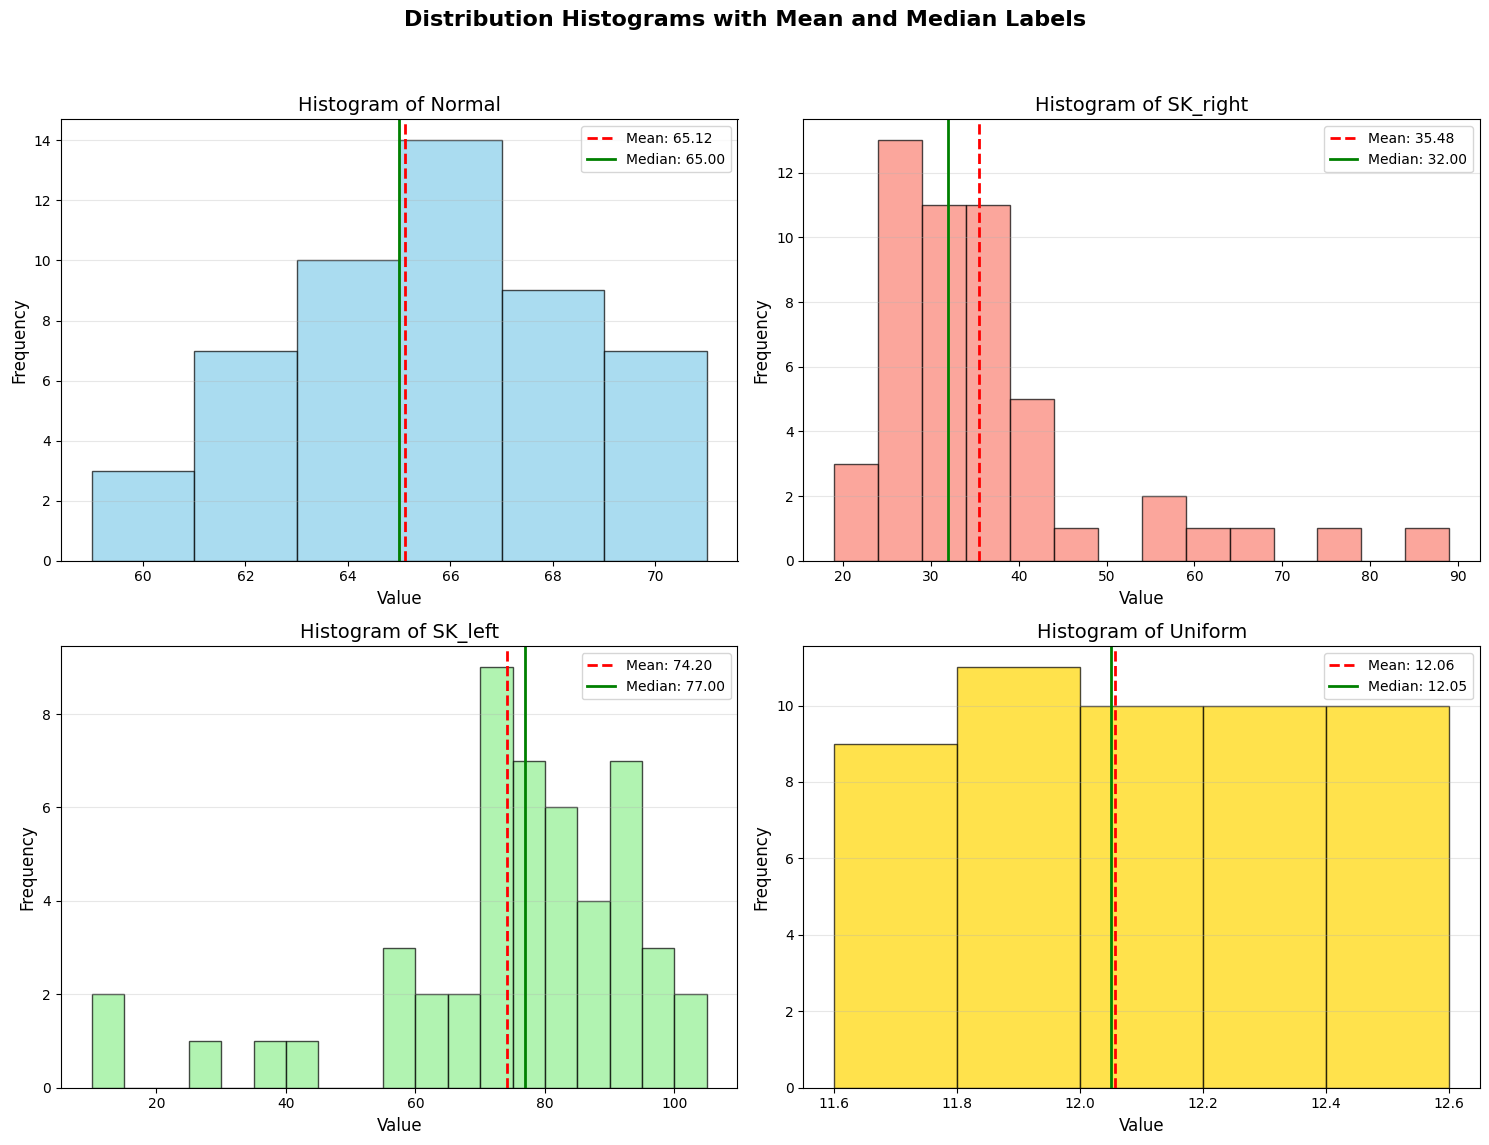

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 1. Upload and Load Data
print("Step 1: Upload 'Data-1.csv'")
uploaded = files.upload()
df = pd.read_csv('Data-1.csv')

# --- QUESTION 1: Measures of Center ---
stats = pd.DataFrame({
    'Mean': df.mean(),
    'Median': df.median(),
    'Mode': df.mode().iloc[0]
})
print("\n[ANSWER TO Q1] Table of Centers:")
display(stats.round(2))

# --- QUESTION 2 & 3: Comparison and Relationship ---
def calculate_moments(data):
    n = len(data)
    mean = data.mean()
    # Central Moment Formula: sum((x - mean)^k) / n
    m1 = np.sum(data - mean) / n
    m2 = np.sum((data - mean)**2) / n
    m3 = np.sum((data - mean)**3) / n
    m4 = np.sum((data - mean)**4) / n

    # Cleaning step: remove negative signs from values effectively equal to zero
    moments = [m1, m2, m3, m4]
    cleaned_moments = [0.0 if abs(m) < 1e-12 else m for m in moments]
    return cleaned_moments

# Run calculations
results = {col: calculate_moments(df[col]) for col in df.columns}

# Format into a clean table
moments_df = pd.DataFrame(results, index=['1st Moment', '2nd Moment', '3rd Moment', '4th Moment']).T
print("--- MOMENTS ABOUT THE MEAN (VERIFIED) ---")
display(moments_df.round(4))

# Focus on Normal (Female Height) and set A = 75
data = df['Normal']
A = 75
n = len(data)

# Calculate Raw Moments about A
m1 = np.sum(data - A) / n
m2 = np.sum((data - A)**2) / n
m3 = np.sum((data - A)**3) / n
m4 = np.sum((data - A)**4) / n

# Create the clean table
q3_results = {
    'Moment Type': ['(a) 1st Moment', '(b) 2nd Moment', '(c) 3rd Moment', '(d) 4th Moment'],
    'Formula': [f'avg(x - {A})', f'avg(x - {A})²', f'avg(x - {A})³', f'avg(x - {A})⁴'],
    'Calculated Value': [m1, m2, m3, m4]
}

q3_df = pd.DataFrame(q3_results)

print(f"--- Question 3: Moments about A = {A} ---")
display(q3_df.style.hide(axis='index').format({'Calculated Value': '{:.4f}'}))

# --- QUESTION 4: Visualizing for the Best Measure ---
print("\n[ANSWER TO Q4] Visualizing which center is 'Best' (Red=Mean, Green=Median)")

x = df["Normal"]

m1p = (x).mean()
m2p = (x**2).mean()
m3p = (x**3).mean()
m4p = (x**4).mean()

# 2. Central moments (actual)
m2_actual = ((x - x.mean())**2).mean()
m3_actual = ((x - x.mean())**3).mean()
m4_actual = ((x - x.mean())**4).mean()

# 3. Central moments (calculated from formulas)
m2_formula = m2p - m1p**2
m3_formula = m3p - 3*m1p*m2p + 2*m1p**3
m4_formula = m4p - 4*m1p*m3p + 6*(m1p**2)*m2p - 3*m1p**4

verification_data = {
    "Moment": ["2nd Moment (m2)", "3rd Moment (m3)", "4th Moment (m4)"],
    "From Formula": [m2_formula, m3_formula, m4_formula],
    "Actual Calculation": [m2_actual, m3_actual, m4_actual],
}

verification_df = pd.DataFrame(verification_data)

print("--- VERIFICATION OF MOMENT RELATIONS (NORMAL DATA) ---")
display(verification_df.style.hide(axis='index').format({
    'From Formula': '{:.4f}',
    'Actual Calculation': '{:.4f}',
}))

# Set up the plotting area (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution Histograms with Mean and Median Labels', fontsize=16, fontweight='bold')

# Define configurations for each column: (Column, Bin Width, Color, Axis)
configs = [
    ('Normal', 2, 'skyblue', axes[0, 0]),
    ('SK_right', 5, 'salmon', axes[0, 1]),
    ('SK_left', 5, 'lightgreen', axes[1, 0]),
    ('Uniform', 0.2, 'gold', axes[1, 1])
]

for col, bin_width, color, ax in configs:
    # Calculate statistics
    mean_val = df[col].mean()
    median_val = df[col].median()

    # Create bins based on the specified bin width
    bins = np.arange(min(df[col]), max(df[col]) + bin_width, bin_width)

    # Plot the histogram
    ax.hist(df[col], bins=bins, color=color, edgecolor='black', alpha=0.7)

    # Add vertical lines for Mean and Median
    ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='solid', linewidth=2, label=f'Median: {median_val:.2f}')

    # Add Labels and Title
    ax.set_title(f'Histogram of {col}', fontsize=14)
    ax.set_xlabel('Value', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

# Adjust layout so labels don't overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Saving Data-1.csv to Data-1 (18).csv
--- Descriptive Statistics ---


,Mean,Median,Mode
Normal,65.120,65.00,65.0
SK_right,35.480,32.00,26.0
SK_left,74.200,77.00,73.0
Uniform,12.056,12.05,11.9


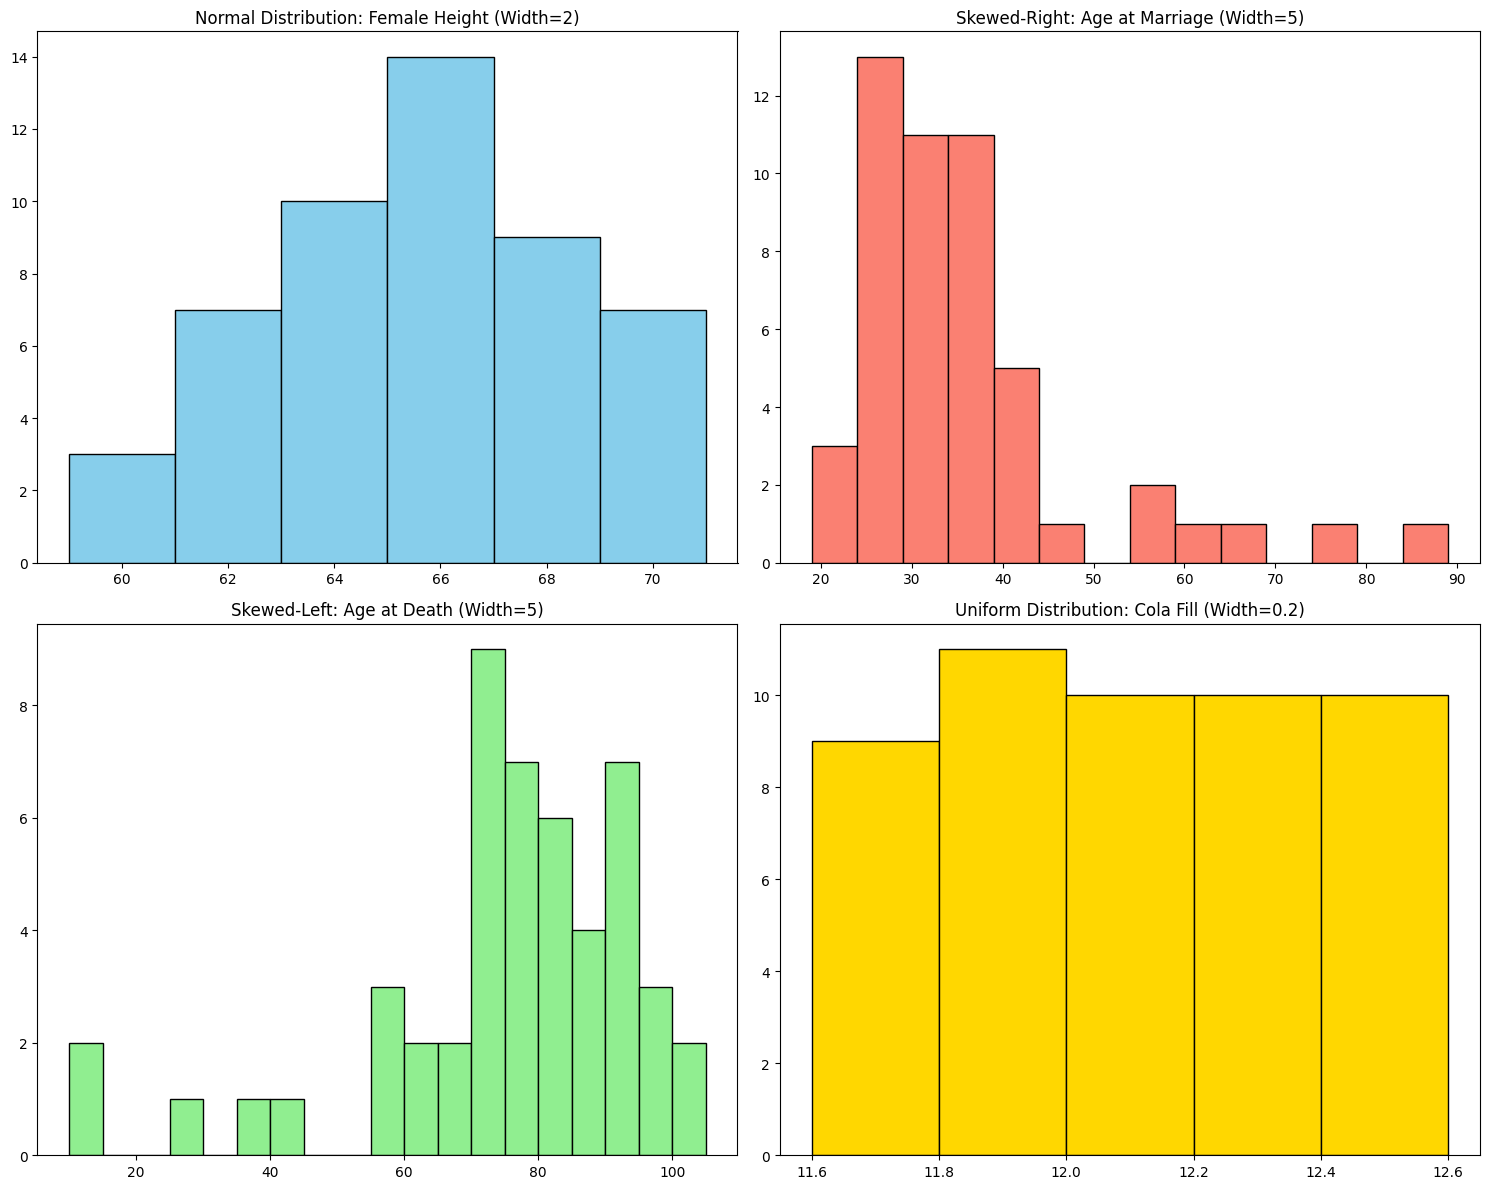

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# 1. Upload your file
# When you run this, a button will appear to select 'Data-1.csv' from your computer
uploaded = files.upload()

# 2. Load the data
df = pd.read_csv('Data-1.csv')

# 3. Calculate Measures of Center
stats = pd.DataFrame({
    'Mean': df.mean(),
    'Median': df.median(),
    'Mode': df.mode().iloc[0]
})

print("--- Descriptive Statistics ---")
display(stats) # 'display' makes it look like a nice table in Colab

# 4. Create the Visualizations (Histograms)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Normal (Female Height) - Class width 2
axes[0, 0].hist(df['Normal'], bins=np.arange(df['Normal'].min(), df['Normal'].max() + 2, 2),
                color='skyblue', edgecolor='black')
axes[0, 0].set_title('Normal Distribution: Female Height (Width=2)')

# Skewed-Right (Marriage Age) - Class width 5
axes[0, 1].hist(df['SK_right'], bins=np.arange(df['SK_right'].min(), df['SK_right'].max() + 5, 5),
                color='salmon', edgecolor='black')
axes[0, 1].set_title('Skewed-Right: Age at Marriage (Width=5)')

# Skewed-Left (Age at Death) - Class width 5
axes[1, 0].hist(df['SK_left'], bins=np.arange(df['SK_left'].min(), df['SK_left'].max() + 5, 5),
                color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Skewed-Left: Age at Death (Width=5)')

# Uniform (Cola Fill) - Class width 0.2
axes[1, 1].hist(df['Uniform'], bins=np.arange(df['Uniform'].min(), df['Uniform'].max() + 0.2, 0.2),
                color='gold', edgecolor='black')
axes[1, 1].set_title('Uniform Distribution: Cola Fill (Width=0.2)')

plt.tight_layout()
plt.show()

Step 1: Upload 'Data-1.csv'


Saving Data-1.csv to Data-1 (11).csv

[ANSWER TO Q1] Table of Centers:


,Mean,Median,Mode
Normal,65.12,65.00,65.0
SK_right,35.48,32.00,26.0
SK_left,74.20,77.00,73.0
Uniform,12.06,12.05,11.9


--- [ANSWERS FOR Q2 & Q3] ---
Distribution | Mean     | Median   | Observation
-------------------------------------------------------
Normal       | 65.12    | 65.00    | Mean (65.12) > Median (65.00) -> Skewed-Right
SK_right     | 35.48    | 32.00    | Mean (35.48) > Median (32.00) -> Skewed-Right
SK_left      | 74.20    | 77.00    | Mean (74.20) < Median (77.00) -> Skewed-Left
Uniform      | 12.06    | 12.05    | Mean (12.06) ≈ Median (12.05) -> Symmetric
------------------------------------------------------------

[ANSWER TO Q4] Visualizing which center is 'Best' (Red=Mean, Green=Median)
Check m2: 8.305599999999686
Check m3: -0.47174399998039007
Check m4: 160.9486259073019


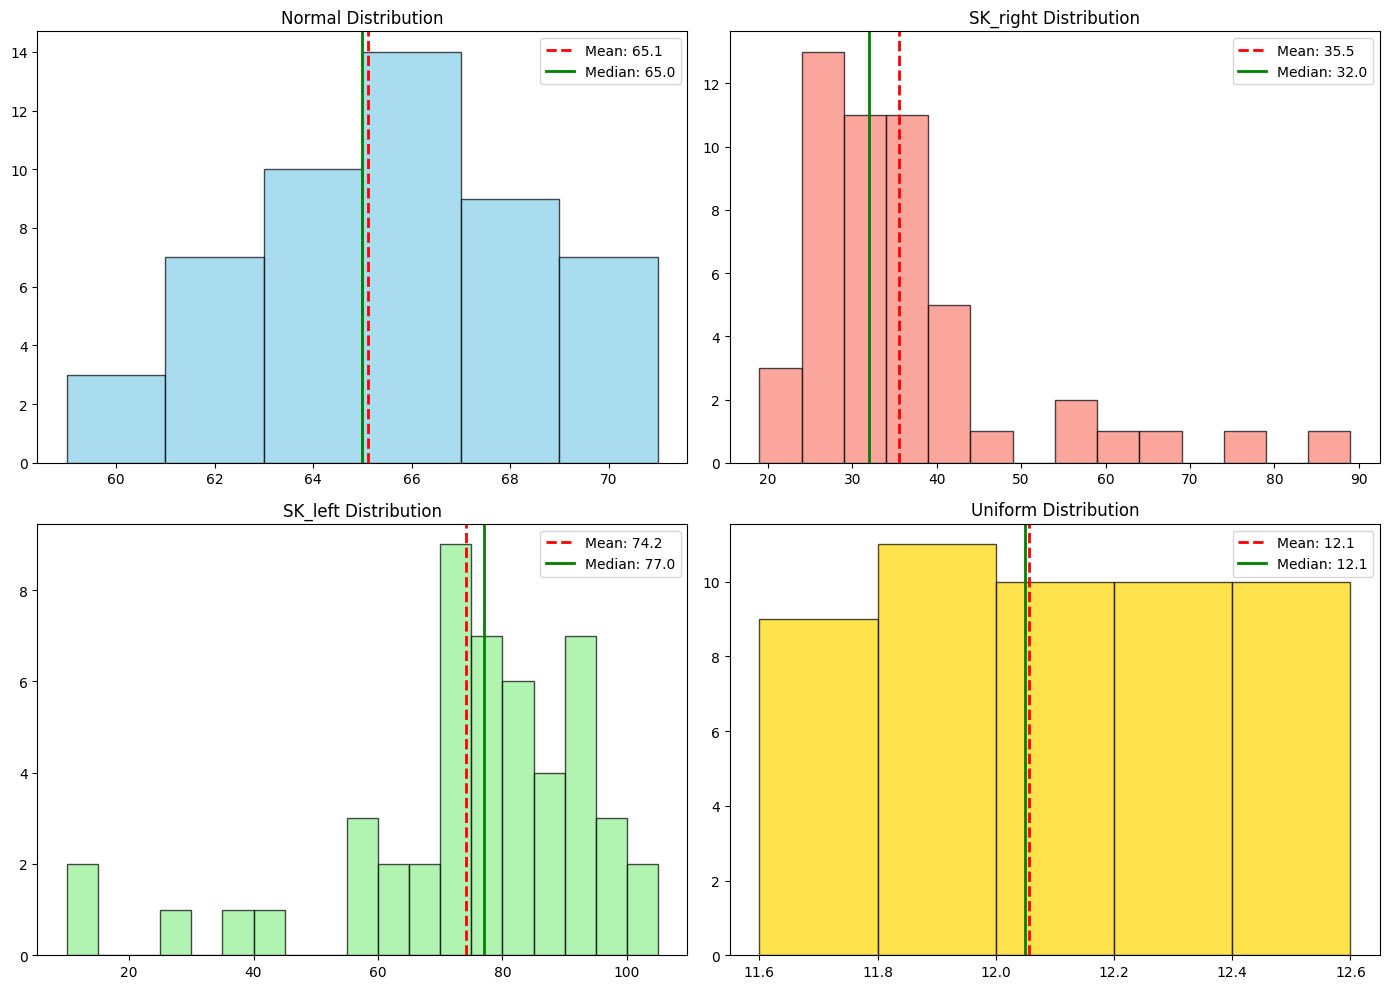

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 1. Upload and Load Data
print("Step 1: Upload 'Data-1.csv'")
uploaded = files.upload()
df = pd.read_csv('Data-1.csv')

# --- QUESTION 1: Measures of Center ---
stats = pd.DataFrame({
    'Mean': df.mean(),
    'Median': df.median(),
    'Mode': df.mode().iloc[0]
})
print("\n[ANSWER TO Q1] Table of Centers:")
display(stats.round(2))

# --- QUESTION 2 & 3: Comparison and Relationship ---
print("--- [ANSWERS FOR Q2 & Q3] ---")
print(f"{'Distribution':<12} | {'Mean':<8} | {'Median':<8} | {'Observation'}")
print("-" * 55)

for col in df.columns:
    mean_val = df[col].mean()
    median_val = df[col].median()

    if mean_val > median_val + 0.1:
        result = f"Mean ({mean_val:.2f}) > Median ({median_val:.2f}) -> Skewed-Right"
    elif mean_val < median_val - 0.1:
        result = f"Mean ({mean_val:.2f}) < Median ({median_val:.2f}) -> Skewed-Left"
    else:
        result = f"Mean ({mean_val:.2f}) ≈ Median ({median_val:.2f}) -> Symmetric"

    print(f"{col:<12} | {mean_val:<8.2f} | {median_val:<8.2f} | {result}")
print("-" * 60)

# --- QUESTION 4: Visualizing for the Best Measure ---
print("\n[ANSWER TO Q4] Visualizing which center is 'Best' (Red=Mean, Green=Median)")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

x = df["Normal"]

m1p = (x).mean()
m2p = (x**2).mean()
m3p = (x**3).mean()
m4p = (x**4).mean()

m2 = ((x-x.mean())**2).mean()
m3 = ((x-x.mean())**3).mean()
m4 = ((x-x.mean())**4).mean()

print("Check m2:", m2p - m1p**2)
print("Check m3:", m3p - 3*m1p*m2p + 2*m1p**3)
print("Check m4:", m4p - 4*m1p*m3p + 6*(m1p**2)*m2p - 3*m1p**4)

# Settings for histograms (Question 5 widths)
configs = [
    ('Normal', 2, 'skyblue', axes[0,0]),
    ('SK_right', 5, 'salmon', axes[0,1]),
    ('SK_left', 5, 'lightgreen', axes[1,0]),
    ('Uniform', 0.2, 'gold', axes[1,1])
]

for col, width, color, ax in configs:
    # Plot histogram
    bins = np.arange(df[col].min(), df[col].max() + width, width)
    ax.hist(df[col], bins=bins, color=color, edgecolor='black', alpha=0.7)

    # Add vertical lines for Mean and Median
    ax.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {df[col].mean():.1f}')
    ax.axvline(df[col].median(), color='green', linestyle='solid', linewidth=2, label=f'Median: {df[col].median():.1f}')

    ax.set_title(f'{col} Distribution')
    ax.legend()

plt.tight_layout()
plt.show()
